In [266]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

le = preprocessing.LabelEncoder()

df1 = pd.read_csv("Heart.csv", delimiter=";")
df1 = df1.drop(df1[df1.ca == '?'].index)
df1 = df1.drop(df1[df1.thal == '?'].index)
X1 = df1[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']].values
Y1 = df1['num']
Y1 = Y1.replace(to_replace=[1,2,3,4], value=1)

df2 = pd.read_csv("OJ.csv").dropna()
df2['Purchase'] = le.fit_transform(df2['Purchase'])
df2['Store7'] = le.fit_transform(df2['Store7'])
X2 = df2[['WeekofPurchase','StoreID', 'PriceCH','PriceMM', 'DiscCH', 'DiscMM', 'SpecialCH', 'SpecialMM', 'LoyalCH','SalePriceMM', 'SalePriceCH', 'PriceDiff', 'Store7', 'PctDiscMM','PctDiscCH', 'ListPriceDiff', 'STORE']].values
Y2 = df2["Purchase"]

In [274]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X1,Y1, test_size=0.5)

ERR_BC = []
ERR_RF = []
OOB_BC = []
OOB_RF = []

I = np.linspace(1,300, 150)
for i in I:
    n = int(i)
    
    BC = BaggingClassifier(n_estimators = n, oob_score=True)
    BC.fit(X_train, Y_train)
    PredBC = BC.predict(X_test)
    C_BC = (Y_test == PredBC)
    ERR_BC.append(len(C_BC[C_BC==False])/len(Y_test))
    OOB_BC.append(1-BC.oob_score_)
    
    RF = RandomForestClassifier(n_estimators = n, oob_score=True)
    RF.fit(X_train, Y_train)
    PredRF = RF.predict(X_test)
    C_RF = (Y_test == PredRF)
    ERR_RF.append(len(C_RF[C_RF==False])/len(Y_test))
    OOB_RF.append(1-RF.oob_score_)

C:\Users\CristianMB\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\CristianMB\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:610: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
C:\Users\CristianMB\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\CristianMB\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\CristianMB\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:605: UserWarning: Some inputs do not hav

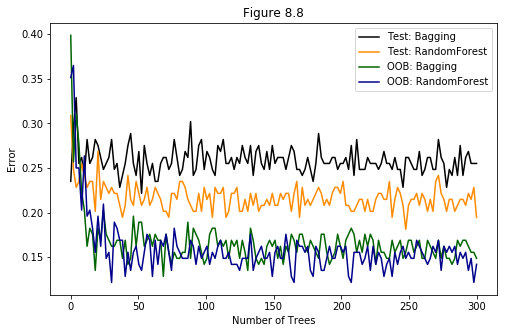

In [278]:
plt.figure(figsize=(8, 5))
plt.title("Figure 8.8")
plt.xlabel("Number of Trees")
plt.ylabel("Error")
plt.plot(np.linspace(0,300, len(ERR_BC)), ERR_BC, color="black", label = 'Test: Bagging')
plt.plot(np.linspace(0,300, len(ERR_RF)), ERR_RF, color = "darkorange", label = 'Test: RandomForest')
plt.plot(np.linspace(0,300, len(OOB_BC)), OOB_BC, color = "darkgreen", label = 'OOB: Bagging')
plt.plot(np.linspace(0,300, len(OOB_RF)), OOB_RF, color = "darkblue", label = 'OOB: RandomForest')
plt.legend()

In [276]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X2,Y2, test_size=0.5)

RF_Root = []
RF_Normal = []
RF_Half = []

I = np.linspace(1,500, 100)
for i in I:
    n=int(i)
    RF1 = RandomForestClassifier(n_estimators = n, max_features= None)
    RF2 = RandomForestClassifier(n_estimators = n, max_features= "sqrt")
    RF3 = RandomForestClassifier(n_estimators = n, max_features= 0.5)

    RF1.fit(X_train, Y_train)
    PredRF1 = RF1.predict(X_test)
    C_RF1 = (Y_test == PredRF1)
    RF_Normal.append(len(C_RF1[C_RF1==False])/len(Y_test))

    RF2.fit(X_train, Y_train)
    PredRF2 = RF2.predict(X_test)
    C_RF2 = (Y_test == PredRF2)
    RF_Root.append(len(C_RF2[C_RF2==False])/len(Y_test))
    
    RF3.fit(X_train, Y_train)
    PredRF3 = RF3.predict(X_test)
    C_RF3 = (Y_test == PredRF3)
    RF_Half.append(len(C_RF3[C_RF3==False])/len(Y_test))

    

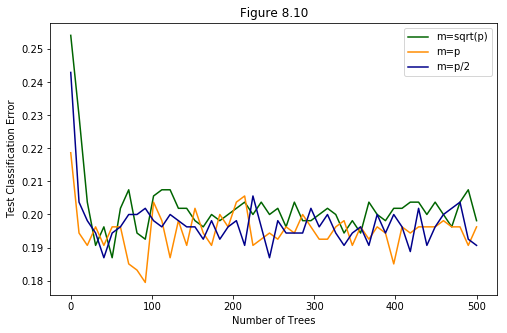

In [279]:
plt.figure(figsize=(8,5))
plt.title("Figure 8.10")
plt.xlabel("Number of Trees")
plt.ylabel("Test Classification Error")
plt.plot(np.linspace(0,500, len(RF_Root)), RF_Root, color="darkgreen", label = 'm=sqrt(p)')
plt.plot(np.linspace(0,500, len(RF_Normal)), RF_Normal, color = "darkorange", label = 'm=p')
plt.plot(np.linspace(0,500, len(RF_Half)), RF_Half, color = "darkblue", label = 'm=p/2')
plt.legend()

C:\Users\CristianMB\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


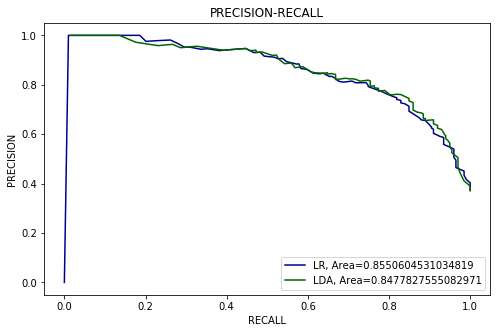

In [305]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X2,Y2, test_size=0.5)
#Uso el mismo set de datos Train y Test para comparar los Modelos

#Logistic Regression
LR = linear_model.LogisticRegression()
LR.fit(X_train, Y_train)
predict = LR.predict(X_test)
proba_yes = LR.predict_proba(X_test)[:,1]

n_p = 100
error_rate = np.zeros(n_p)
precision_LR = np.zeros(n_p)
recall_LR = np.zeros(n_p)
tp_rate = np.zeros(n_p)
fp_rate = np.zeros(n_p)
threshold = np.linspace(0,0.99, n_p)

for i in range(n_p):
    ii = proba_yes>threshold[i]
    predict[ii] = 1
    predict[~ii] = 0
    true_positive = (Y_test == 1) & (predict == 1) 
    false_positive = (Y_test == 0) & (predict == 1)
    false_negative = (Y_test == 1) & (predict == 0)
    true_negative = (Y_test == 0) & (predict == 0)
    n_tp = np.count_nonzero(true_positive)
    n_fp= np.count_nonzero(false_positive)
    n_fn = np.count_nonzero(false_negative)
    n_tn = np.count_nonzero(true_negative)
    if((n_tp+n_fp)>0): precision_LR[i] = n_tp/(n_tp + n_fp)
    if((n_tp+n_fn)>0): recall_LR[i] = n_tp/(n_tp + n_fn); tp_rate[i] = recall[i]  
    if((n_fp+n_tn)>0): fp_rate[i] = n_fp/(n_fp+n_tn)

        
#Linear Discriminant
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, Y_train)
predict = LDA.predict(X_test)
proba_yes = LDA.predict_proba(X_test)[:,1]

n_p = 100
error_rate = np.zeros(n_p)
precision_LDA = np.zeros(n_p)
recall_LDA = np.zeros(n_p)
tp_rate = np.zeros(n_p)
fp_rate = np.zeros(n_p)
threshold = np.linspace(0,0.99, n_p)

for i in range(n_p):
    ii = proba_yes>threshold[i]
    predict[ii] = 1
    predict[~ii] = 0
    true_positive = (Y_test == 1) & (predict == 1) 
    false_positive = (Y_test == 0) & (predict == 1)
    false_negative = (Y_test == 1) & (predict == 0)
    true_negative = (Y_test == 0) & (predict == 0)
    n_tp = np.count_nonzero(true_positive)
    n_fp= np.count_nonzero(false_positive)
    n_fn = np.count_nonzero(false_negative)
    n_tn = np.count_nonzero(true_negative)
    if((n_tp+n_fp)>0): precision_LDA[i] = n_tp/(n_tp + n_fp)
    if((n_tp+n_fn)>0): recall_LDA[i] = n_tp/(n_tp + n_fn); tp_rate[i] = recall[i]  
    if((n_fp+n_tn)>0): fp_rate[i] = n_fp/(n_fp+n_tn)

        
plt.figure(figsize=(8,5))
plt.plot(recall_LR, precision_LR, color="darkblue", label="LR, Area="+str(-np.trapz(precision_LR, recall_LR)))
plt.plot(recall_LDA, precision_LDA, color="darkgreen", label = "LDA, Area="+str(-np.trapz(precision_LDA, recall_LDA, )))
plt.xlabel('RECALL')
plt.ylabel('PRECISION')
plt.title('PRECISION-RECALL')
plt.legend()

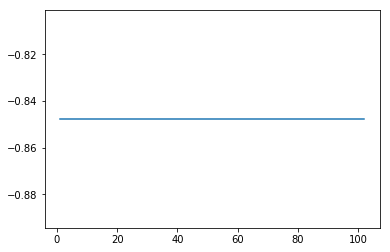

In [309]:
#Random Forest
#Como en el ejercicio previo notamos que con n_features = P obtenemos un menor error, solo variaré la cantidad de arboles

Areas = []
for i in range(1,102, 10):
    RF = RandomForestClassifier(n_estimators = i, max_features= None)
    RF.fit(X_train, Y_train)
    predict = RF1.predict(X_test)
    n_p = 100
    
    error_rate = np.zeros(n_p)
    precision_RF = np.zeros(n_p)
    recall_RF = np.zeros(n_p)
    tp_rate = np.zeros(n_p)
    fp_rate = np.zeros(n_p)
    threshold = np.linspace(0,0.99, n_p)

    for i in range(n_p):
        ii = proba_yes>threshold[i]
        predict[ii] = 1
        predict[~ii] = 0
        true_positive = (Y_test == 1) & (predict == 1) 
        false_positive = (Y_test == 0) & (predict == 1)
        false_negative = (Y_test == 1) & (predict == 0)
        true_negative = (Y_test == 0) & (predict == 0)
        n_tp = np.count_nonzero(true_positive)
        n_fp= np.count_nonzero(false_positive)
        n_fn = np.count_nonzero(false_negative)
        n_tn = np.count_nonzero(true_negative)
        if((n_tp+n_fp)>0): precision_RF[i] = n_tp/(n_tp + n_fp)
        if((n_tp+n_fn)>0): recall_RF[i] = n_tp/(n_tp + n_fn); tp_rate[i] = recall[i]  
        if((n_fp+n_tn)>0): fp_rate[i] = n_fp/(n_fp+n_tn)
            
    Areas.append(np.trapz(precision_RF, recall_RF))

plt.plot(np.linspace(1,102, len(Areas)), Areas)
    